# StayWhereEver

## Imports
Import the libraries we need to perform the analysis.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st

## Task 3:  Initial Exploration


<div style="background-color:#f8d7da; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">


In [94]:

neighborhoods = pd.read_csv("neighborhoods.csv")

In [95]:
properties = pd.read_csv("properties.csv", low_memory=False)

In [96]:

neighborhoods.head()

,id,neighborhood_group,neighborhood,country
0,1,Brooklyn,Kensington,United States
1,2,Manhattan,Midtown,United States
2,3,Manhattan,Harlem,United States
3,4,Brooklyn,Clinton Hill,United States
4,5,Manhattan,East Harlem,United States


In [97]:
properties.head()

,id,name,host_id,host_identity_verified,host_name,latitude,longitude,neighborhood_id,instant_bookable,cancellation_policy,room_type,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,40.64749,-73.97237,1.0,False,strict,Private room,$966,$193,10.0,9.0,10/19/2021,0.21,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,40.75362,-73.98377,2.0,False,moderate,Entire home/apt,$142,$28,30.0,45.0,5/21/2022,0.38,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,40.80902,-73.94190,3.0,True,flexible,Private room,$620,$124,3.0,0.0,NaN,NaN,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,40.68514,-73.95976,4.0,True,moderate,Entire home/apt,$368,$74,30.0,270.0,7/5/2019,4.64,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,40.79851,-73.94399,5.0,False,moderate,Entire home/apt,$204,$41,10.0,9.0,11/19/2018,0.10,289.0,"Please no smoking in the house, porch or on th...",NaN


In [98]:
properties.shape

(102058, 20)

In [99]:
neighborhoods.shape

(223, 4)

In [100]:

properties.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'latitude', 'longitude', 'neighborhood_id', 'instant_bookable',
       'cancellation_policy', 'room_type', 'price', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'availability_365', 'house_rules', 'license'],
      dtype='object')

In [101]:
neighborhoods.columns

Index(['id', 'neighborhood_group', 'neighborhood', 'country'], dtype='object')

In [102]:
# List the data types of each column
neighborhoods.dtypes

id                     int64
neighborhood_group    object
neighborhood          object
country               object
dtype: object

In [103]:
properties.dtypes

id                          int64
name                       object
host_id                     int64
host_identity_verified     object
host_name                  object
latitude                  float64
longitude                 float64
neighborhood_id           float64
instant_bookable           object
cancellation_policy        object
room_type                  object
price                      object
service_fee                object
minimum_nights            float64
number_of_reviews         float64
last_review                object
reviews_per_month         float64
availability_365          float64
house_rules                object
license                    object
dtype: object

### 3.2 Sense Check

<div style="background-color: #f8d7da; padding: 10px;">
    
* __host_identity_verified__ is in essence a boolean but it is not in a true/false format. This is fine as an object wont cause major impact.
* __instant_bookable__ Should be a boolean but due to nan's I understand why its a object. PASS
* __price & service_fee__ Need to be changed to int or float. 
* Every other column is fine. 

### 3.3 Review

<hr/>

### 4.1 Further Inspect the Dataset

In [104]:

properties.dtypes

id                          int64
name                       object
host_id                     int64
host_identity_verified     object
host_name                  object
latitude                  float64
longitude                 float64
neighborhood_id           float64
instant_bookable           object
cancellation_policy        object
room_type                  object
price                      object
service_fee                object
minimum_nights            float64
number_of_reviews         float64
last_review                object
reviews_per_month         float64
availability_365          float64
house_rules                object
license                    object
dtype: object

In [105]:
neighborhoods.describe

<bound method NDFrame.describe of         id neighborhood_group            neighborhood        country
0        1           Brooklyn              Kensington  United States
1        2          Manhattan                 Midtown  United States
2        3          Manhattan                  Harlem  United States
3        4           Brooklyn            Clinton Hill  United States
4        5          Manhattan             East Harlem  United States
..     ...                ...                     ...            ...
218  33700             Queens            Breezy Point  United States
219  34163      Staten Island             Willowbrook  United States
220  51124             Queens               Glen Oaks  United States
221  52049           Brooklyn         Gerritsen Beach  United States
222  53138      Staten Island  Chelsea, Staten Island  United States

[223 rows x 4 columns]>

In [106]:
neighborhoods.dtypes

id                     int64
neighborhood_group    object
neighborhood          object
country               object
dtype: object

In [107]:
#Nominal
check_1 = properties['name'].value_counts()
print("Unique values and their counts:\n", check_1)

Unique values and their counts:
 Home away from home                                  33
Hillside Hotel                                       30
Water View King Bed Hotel Room                       30
Brooklyn Apartment                                   27
New york Multi-unit building                         27
                                                     ..
Modern & trendy serenity—great High Line location     1
Quiet, light-filled, Soho apartment                   1
Sunny and cozy room 10 minutes from Times Sq.61F3     1
1 bedroom apartment across the Central Park           1
Parisian Style Apartment in Heart of Brooklyn         1
Name: name, Length: 61281, dtype: int64


In [108]:
#Binary
check_2 = properties['host_identity_verified'].value_counts()
print("Unique values and their counts:\n", check_2)

Unique values and their counts:
 unconfirmed    50944
verified       50825
Name: host_identity_verified, dtype: int64


<div style="background-color: #f8d7da; padding: 10px; color: #721c24; border: 1px solid #f5c6cb;">
    <strong>Alert:</strong> There is an issue that requires attention! Only half of your hosts have been verified. 
</div>

In [109]:
#Nominal
check3 = properties['room_type'].value_counts()
check3

Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: room_type, dtype: int64

In [110]:
#Ordinal
check4 = properties['last_review'].value_counts()
check4

6/23/2019    2436
6/30/2019    2221
7/1/2019     2204
6/24/2019    1506
7/7/2019     1147
             ... 
7/21/2020       1
7/20/2020       1
9/15/2014       1
9/11/2013       1
9/30/2014       1
Name: last_review, Length: 2477, dtype: int64

In [111]:
#Nominal
check_5 = properties['minimum_nights'].value_counts()
print("Unique values and their counts:\n", check_5)

Unique values and their counts:
  1.0      25290
 2.0      23495
 3.0      16038
 30.0     11554
 4.0       6606
          ...  
-3.0          1
 273.0        1
 175.0        1
 98.0         1
 825.0        1
Name: minimum_nights, Length: 153, dtype: int64


#### 4.1.b Fixing any Data Issues Necessary

<div style="background-color:#f8d7da; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
<font color="crimson"> The data types for the following columns will be changed :
   
    
__Price and Service Fee__
    
#properties['price'] = properties['price'].str.replace('[^\d.]', '', regex=True)
#properties['price'] = properties['price'].replace('', '0')
#properties['price'] = properties['price'].astype(float)
#properties['price'] = properties['price'].fillna(0).astype(int)
print(properties['price']) (Potential Code)
    </font></div>

In [112]:
properties['price'] = properties['price'].str.replace('$','',regex=False)

In [113]:
properties['price'] = properties['price'].str.replace(',','',regex=False)

In [114]:
properties['service_fee'] = properties['service_fee'].str.replace('$','',regex=False)

In [115]:
properties['service_fee'] = properties['service_fee'].str.replace(',','',regex=False)

In [116]:
properties['price'] = properties['price'].str.strip()

In [117]:
properties['service_fee'] = properties['service_fee'].str.strip()

In [118]:
properties.head(5)

,id,name,host_id,host_identity_verified,host_name,latitude,longitude,neighborhood_id,instant_bookable,cancellation_policy,room_type,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,40.64749,-73.97237,1.0,False,strict,Private room,966,193,10.0,9.0,10/19/2021,0.21,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,40.75362,-73.98377,2.0,False,moderate,Entire home/apt,142,28,30.0,45.0,5/21/2022,0.38,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,40.80902,-73.94190,3.0,True,flexible,Private room,620,124,3.0,0.0,NaN,NaN,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,40.68514,-73.95976,4.0,True,moderate,Entire home/apt,368,74,30.0,270.0,7/5/2019,4.64,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,40.79851,-73.94399,5.0,False,moderate,Entire home/apt,204,41,10.0,9.0,11/19/2018,0.10,289.0,"Please no smoking in the house, porch or on th...",NaN


In [119]:
properties.dtypes

id                          int64
name                       object
host_id                     int64
host_identity_verified     object
host_name                  object
latitude                  float64
longitude                 float64
neighborhood_id           float64
instant_bookable           object
cancellation_policy        object
room_type                  object
price                      object
service_fee                object
minimum_nights            float64
number_of_reviews         float64
last_review                object
reviews_per_month         float64
availability_365          float64
house_rules                object
license                    object
dtype: object

In [120]:
properties['service_fee'] = properties['service_fee'].astype('float')

In [121]:
properties.head(2)

,id,name,host_id,host_identity_verified,host_name,latitude,longitude,neighborhood_id,instant_bookable,cancellation_policy,room_type,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,40.64749,-73.97237,1.0,False,strict,Private room,966,193.0,10.0,9.0,10/19/2021,0.21,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,40.75362,-73.98377,2.0,False,moderate,Entire home/apt,142,28.0,30.0,45.0,5/21/2022,0.38,228.0,Pet friendly but please confirm with me if the...,NaN


In [122]:
properties['price'] = properties['price'].astype('float')

<div style="background-color: #d4edda; padding: 10px;">
Converted columns price and service_fee to floats.
</div>

#### 4.1.c Descriptive Stats for Numeric Type Columns



In [123]:
# Getting the descriptive stats for the numeric columns
numeric_columns = neighborhoods.select_dtypes(include=['int64', 'float64'])
numeric_stats = numeric_columns.describe()
print(numeric_stats)

                 id
count    223.000000
mean    6392.905830
std     9782.183912
min        1.000000
25%      255.000000
50%     1566.000000
75%     9065.500000
max    53138.000000


Neighborhood id is discrete because its a unique identifier. 

In [124]:
#continous
properties['price'].describe()

count    101811.000000
mean        625.355580
std         331.672649
min          50.000000
25%         340.000000
50%         625.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

In [125]:
properties.dtypes

id                          int64
name                       object
host_id                     int64
host_identity_verified     object
host_name                  object
latitude                  float64
longitude                 float64
neighborhood_id           float64
instant_bookable           object
cancellation_policy        object
room_type                  object
price                     float64
service_fee               float64
minimum_nights            float64
number_of_reviews         float64
last_review                object
reviews_per_month         float64
availability_365          float64
house_rules                object
license                    object
dtype: object

In [126]:
#discrete
properties['availability_365'].describe()

count    101610.000000
mean        141.043992
std         135.429156
min         -10.000000
25%           3.000000
50%          96.000000
75%         268.000000
max        3677.000000
Name: availability_365, dtype: float64

In [127]:
properties.head()

,id,name,host_id,host_identity_verified,host_name,latitude,longitude,neighborhood_id,instant_bookable,cancellation_policy,room_type,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,40.64749,-73.97237,1.0,False,strict,Private room,966.0,193.0,10.0,9.0,10/19/2021,0.21,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,40.75362,-73.98377,2.0,False,moderate,Entire home/apt,142.0,28.0,30.0,45.0,5/21/2022,0.38,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,40.80902,-73.94190,3.0,True,flexible,Private room,620.0,124.0,3.0,0.0,NaN,NaN,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,40.68514,-73.95976,4.0,True,moderate,Entire home/apt,368.0,74.0,30.0,270.0,7/5/2019,4.64,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,40.79851,-73.94399,5.0,False,moderate,Entire home/apt,204.0,41.0,10.0,9.0,11/19/2018,0.10,289.0,"Please no smoking in the house, porch or on th...",NaN


In [128]:
properties.describe()

,id,host_id,latitude,longitude,neighborhood_id,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,102042.000000,101811.000000,101785.000000,101658.000000,101875.000000,86240.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,483.946551,625.355580,125.039249,8.126640,27.517948,1.375408,141.043992
std,1.627173e+07,2.853742e+10,0.055852,0.049502,2100.188124,331.672649,66.325905,30.616698,49.571744,1.748019,135.429156
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,1.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,10.000000,340.000000,68.000000,2.000000,1.000000,0.220000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,31.000000,625.000000,125.000000,3.000000,7.000000,0.740000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,171.000000,913.000000,183.000000,5.000000,31.000000,2.010000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,53138.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,3677.000000


In [129]:
#discrete
properties['id'].describe()

count    1.020580e+05
mean     2.918438e+07
std      1.627173e+07
min      1.001254e+06
25%      1.509286e+07
50%      2.918438e+07
75%      4.327590e+07
max      5.736742e+07
Name: id, dtype: float64

In [130]:
#discrete
properties['price'].describe()

count    101811.000000
mean        625.355580
std         331.672649
min          50.000000
25%         340.000000
50%         625.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

In [131]:
#continuous
properties['reviews_per_month'].describe()

count    86240.000000
mean         1.375408
std          1.748019
min          0.010000
25%          0.220000
50%          0.740000
75%          2.010000
max         90.000000
Name: reviews_per_month, dtype: float64

<hr/>

## Task 5: Identify Missing Values


In [132]:
# Percentage of null values
properties.isnull().mean() * 100

id                         0.000000
name                       0.244959
host_id                    0.000000
host_identity_verified     0.283172
host_name                  0.395853
latitude                   0.007839
longitude                  0.007839
neighborhood_id            0.015677
instant_bookable           0.102883
cancellation_policy        0.074467
room_type                  0.000000
price                      0.242019
service_fee                0.267495
minimum_nights             0.391934
number_of_reviews          0.179310
last_review               15.512748
reviews_per_month         15.499030
availability_365           0.438966
house_rules               50.796606
license                   99.998040
dtype: float64

<div style="background-color: #f8d7da; padding: 10px;">
    
* License is 99% nulls huge problem. Essential for compliance or legal reasons
* House_rules 50% null may need to address this issue, especially if house rules are significant for our rental company's policies
* Last_review & reviews_per_month have 15% missing values. Depending on your analysis may pose an issue.

In [133]:
neighborhoods.isnull().mean() * 100

id                    0.000000
neighborhood_group    1.793722
neighborhood          0.000000
country               2.242152
dtype: float64

<div style="background-color: #f8d7da; padding: 10px;">
    
* Neighborhoods is pretty good in regards to nulls. 

In [134]:
# Number of null values
properties.isnull().sum()

id                             0
name                         250
host_id                        0
host_identity_verified       289
host_name                    404
latitude                       8
longitude                      8
neighborhood_id               16
instant_bookable             105
cancellation_policy           76
room_type                      0
price                        247
service_fee                  273
minimum_nights               400
number_of_reviews            183
last_review                15832
reviews_per_month          15818
availability_365             448
house_rules                51842
license                   102056
dtype: int64

In [135]:
neighborhoods.isnull().sum()

id                    0
neighborhood_group    4
neighborhood          0
country               5
dtype: int64

In [136]:
# Percentage of zero values and blanks
zero_blank_percentage = (properties[properties == 0].count() + properties[properties == ''].count()) / len(properties) * 100
print(zero_blank_percentage)

id                         0.000000
name                       0.000000
host_id                    0.000000
host_identity_verified     0.000000
host_name                  0.000000
latitude                   0.000000
longitude                  0.000000
neighborhood_id            0.000000
instant_bookable          50.153834
cancellation_policy        0.000000
room_type                  0.000000
price                      0.000000
service_fee                0.000000
minimum_nights             0.000000
number_of_reviews         15.356954
last_review                0.000000
reviews_per_month          0.000000
availability_365          22.975171
house_rules                0.000000
license                    0.000000
dtype: float64


In [137]:
zero_blank_percentage = (neighborhoods[neighborhoods == 0].count() + neighborhoods[neighborhoods == ''].count()) / len(neighborhoods) * 100
print(zero_blank_percentage)

id                    0.0
neighborhood_group    0.0
neighborhood          0.0
country               0.0
dtype: float64


In [138]:
# Number of zero values
zero_counts = (properties == 0).sum()
print(zero_counts)

id                            0
name                          0
host_id                       0
host_identity_verified        0
host_name                     0
latitude                      0
longitude                     0
neighborhood_id               0
instant_bookable          51186
cancellation_policy           0
room_type                     0
price                         0
service_fee                   0
minimum_nights                0
number_of_reviews         15673
last_review                   0
reviews_per_month             0
availability_365          23448
house_rules                   0
license                       0
dtype: int64


In [139]:
hood_zero_counts = (neighborhoods == 0).sum()
print(hood_zero_counts)

id                    0
neighborhood_group    0
neighborhood          0
country               0
dtype: int64


In [140]:
# Percentage of null and zero values
neighborhoods.isnull().sum().sum()/len(neighborhoods)

0.04035874439461883

In [141]:
null_percentage = properties.isnull().mean() * 100
zero_percentage = (properties == 0).mean() * 100
print(null_percentage)
print(zero_percentage)

id                         0.000000
name                       0.244959
host_id                    0.000000
host_identity_verified     0.283172
host_name                  0.395853
latitude                   0.007839
longitude                  0.007839
neighborhood_id            0.015677
instant_bookable           0.102883
cancellation_policy        0.074467
room_type                  0.000000
price                      0.242019
service_fee                0.267495
minimum_nights             0.391934
number_of_reviews          0.179310
last_review               15.512748
reviews_per_month         15.499030
availability_365           0.438966
house_rules               50.796606
license                   99.998040
dtype: float64
id                         0.000000
name                       0.000000
host_id                    0.000000
host_identity_verified     0.000000
host_name                  0.000000
latitude                   0.000000
longitude                  0.000000
neighborhood_

In [142]:
null_percentage1 = neighborhoods.isnull().mean() * 100
zero_percentage1 = (neighborhoods == 0).mean() * 100
print(null_percentage1)
print(zero_percentage1)

id                    0.000000
neighborhood_group    1.793722
neighborhood          0.000000
country               2.242152
dtype: float64
id                    0.0
neighborhood_group    0.0
neighborhood          0.0
country               0.0
dtype: float64


nans = round(df[col].isna().sum()/df.shape[0]*100, 1)

In [143]:
# Number of null and zero values
properties.isnull().sum()

id                             0
name                         250
host_id                        0
host_identity_verified       289
host_name                    404
latitude                       8
longitude                      8
neighborhood_id               16
instant_bookable             105
cancellation_policy           76
room_type                      0
price                        247
service_fee                  273
minimum_nights               400
number_of_reviews            183
last_review                15832
reviews_per_month          15818
availability_365             448
house_rules                51842
license                   102056
dtype: int64

### 5.2 Observations



<div style="background-color: #f8d7da; padding: 10px;">
Considering the councils intiatives they should be aware of the following : 
License is 99% nulls huge problem. Essential for compliance or legal reasons
House_rules 50% null may need to address this issue, especially if house rules are significant for our rental company's policies
Last_review & reviews_per_month have 15% missing values. Depending on your analysis may pose an issue.


<hr/>

## Task 6: Identifing Outliers

#### 6.1a: Method 1 - Used boxplot to visually spot the outliers


<AxesSubplot:>

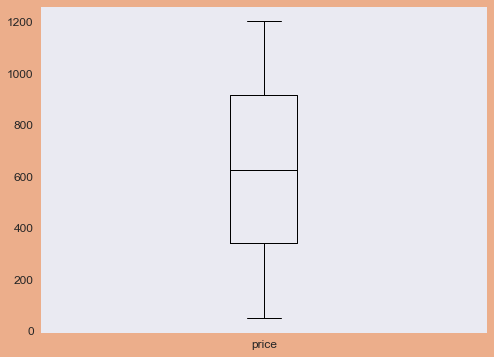

In [144]:
# Plotted
plt.style.use('seaborn')
plt.rcParams['figure.facecolor'] = '#ECAE8B' 
properties.boxplot(column='price', figsize=(8, 6), grid=False, fontsize=12, color='black')

Price seems fine. 

<AxesSubplot:>

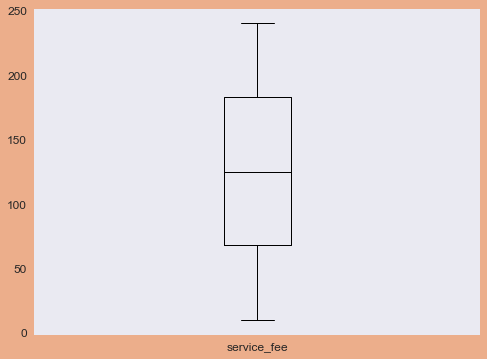

In [145]:
properties.boxplot(column='service_fee', figsize=(8, 6), grid=False, fontsize=12, color='black')

Service fee seems fine. 

<AxesSubplot:>

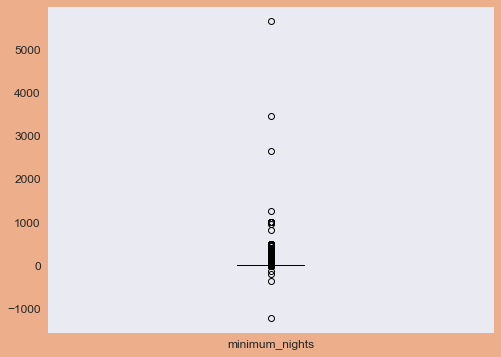

In [146]:
properties.boxplot(column='minimum_nights', figsize=(8, 6), grid=False, fontsize=12, color='black')

* Minimum nights go over 1000, for a short term rental property this is a very high number. Highly likely an error that will throw off analysis.
* Would lead to not enough business. Setting minimum stays that align with typical traveler preferences can attract a broader range of guests and improve overall occupancy rates and revenue. Additionally, clearly communicating minimum stay policies on rental platforms or websites can help manage guest expectations and avoid potential issues related to the outliers.
* Properties with very high minimum stays may gain a reputation for being inflexible or unsuitable for the average traveler's needs.

In [147]:
properties.dtypes

id                          int64
name                       object
host_id                     int64
host_identity_verified     object
host_name                  object
latitude                  float64
longitude                 float64
neighborhood_id           float64
instant_bookable           object
cancellation_policy        object
room_type                  object
price                     float64
service_fee               float64
minimum_nights            float64
number_of_reviews         float64
last_review                object
reviews_per_month         float64
availability_365          float64
house_rules                object
license                    object
dtype: object

<AxesSubplot:>

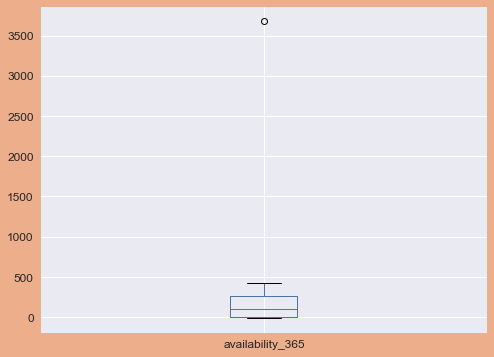

In [148]:
properties.boxplot(column='availability_365', figsize=(8, 6), fontsize=12)

Availability_365 has a outlier of 3677 and there are 365 days in a year. This would mean this is avail years in advance. Might be an error. 

Text(0.5, 1.0, 'Reviews per Month')

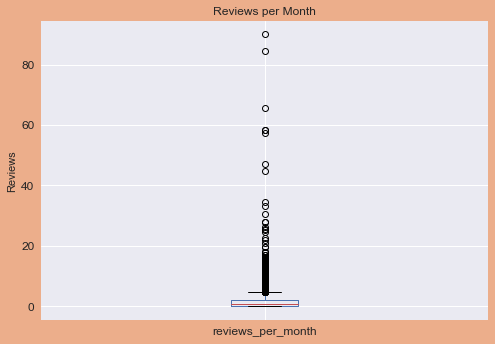

In [149]:
properties.boxplot(column='reviews_per_month', fontsize=12)
plt.ylabel('Reviews')
plt.title('Reviews per Month')

### Fake reviews potentially. This can provide misleading insights. The high numbers of reviews could be positive or negative. 

In [150]:
import geopandas as gpd
from shapely.geometry import Point

# Created a geometry column from the latitude and longitude coordinates
geometry = [Point(xy) for xy in zip(properties['longitude'], properties['latitude'])]

# Created a GeoDataFrame from the properties DataFrame and the geometry column
geo_properties = gpd.GeoDataFrame(properties, geometry=geometry)

In [151]:
geojson_file = r'C:\Users\Yupro-11\Documents\D5\2010 Census Tracts.geojson'
gdf_nyc = gpd.read_file(geojson_file)

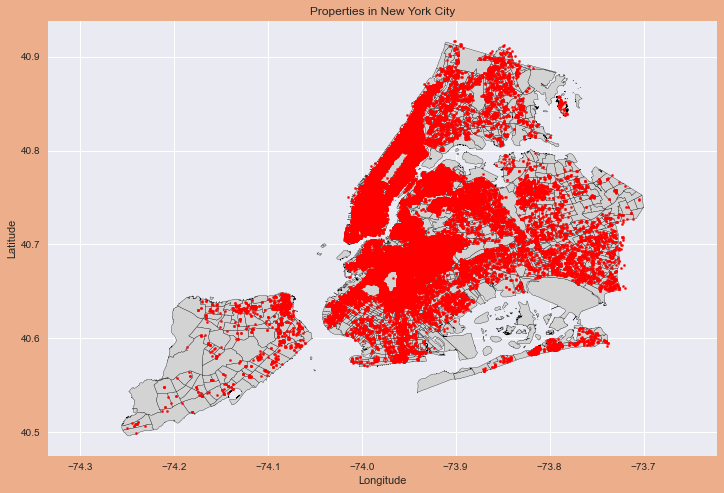

In [152]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf_nyc.plot(ax=ax, color='lightgray', edgecolor='black')
geo_properties.plot(ax=ax, color='red', markersize=5)
ax.set_title("Properties in New York City")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.axis('equal')
plt.show()

Using long anf lat, we created pins to see how much of nyc does staywherever actually cover. Hope the council finds this helpful. 

#### 6.1b: Method 2 - Find the top 1% and bottom 1% of extreme values 
Simply flag the values that are outside the middle 98% of the distribution. This eliminates the extremes from both ends. 

In [153]:
# Calculated the lower and upper thresholds
lower_threshold = properties['reviews_per_month'].quantile(0.01)
upper_threshold = properties['reviews_per_month'].quantile(0.99)

#
mask = (properties['reviews_per_month'] < lower_threshold) | (properties['reviews_per_month'] > upper_threshold)

# 
outliers = properties[mask]

# 
print(outliers)

              id                                               name  \
144      1080867                 Fully Furnished Basement Apartment   
230      1128365                  Nice, clean, safe, convenient 3BR   
318      1176967                                                NaN   
356      1197955                LOVELY APARTMENT IN THE HEART OF NY   
554      1307310                            Modern Condo in Midtown   
...          ...                                                ...   
101637  57135451  Modern Rooftop Loft W/ Private Ensuite & Cityv...   
101647  57140974  Shay's Place #1\n( 1 Bdrm. Apt )\n5 mins From JFK   
101967  57317710                Private bedroom 8 mins-JFK&The Mall   
101990  57330413  5 minutes from JFK,one single cozy bedroom for...   
102040  57358028                      Room in Queens, NY, near LGA.   

            host_id host_identity_verified host_name  latitude  longitude  \
144     57811865410            unconfirmed   Dominik  40.74028  -73.83

In [154]:
# Calculated the lower and upper thresholds
lower_threshold = properties['price'].quantile(0.01)
upper_threshold = properties['price'].quantile(0.99)

# 
mask = (properties['price'] < lower_threshold) | (properties['price'] > upper_threshold)

# 
outliers = properties[mask]

#
print(outliers)

              id                                               name  \
78       1044415                              Little King of Queens   
93       1052700  Large Parlor Room, Landmark Home 1 block to PRATT   
138      1077553                 Room with En Suite Bathroom & Deck   
229      1127813                 Spacious 1BR, Adorable Clean Quiet   
232      1129470    Artistic, Cozy, and Spacious w/ Patio! Sleeps 5   
...          ...                                                ...   
101817  57234865                                Riverside Park Nest   
101881  57270212       BEST LOCATION IN SOHO AND SPACIOUS APARTMENT   
101975  57322129  (2R) Cozy and clean bedroom with private bathroom   
102006  57339250                     Bahia Brazil Vibe - Entire apt   
102008  57340354                Private Room in Brooklyn Brownstone   

            host_id host_identity_verified   host_name  latitude  longitude  \
78      68599531533            unconfirmed     Melanie  40.75038  -7

#### 6.1c: Method 3 -  IQR outlier rule 
This is also an industry standard way of calculating outliers. You can review the rule here: [Box plots](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6052306-calculate-the-value-spread-in-your-data#/id/r-6133902)

In [155]:
# Code here
Q1 = properties['price'].quantile(0.25)
Q3 = properties['price'].quantile(0.75)
IQR = Q3 - Q1

# 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 
mask = (properties['price'] < lower_bound) | (properties['price'] > upper_bound)

# 
outliers = properties[mask]

# 
print(outliers)

Empty DataFrame
Columns: [id, name, host_id, host_identity_verified, host_name, latitude, longitude, neighborhood_id, instant_bookable, cancellation_policy, room_type, price, service_fee, minimum_nights, number_of_reviews, last_review, reviews_per_month, availability_365, house_rules, license]
Index: []


In [156]:
Q1 = properties['reviews_per_month'].quantile(0.25)
Q3 = properties['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Defined the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Created a mask to select outliers
mask = (properties['reviews_per_month'] < lower_bound) | (properties['reviews_per_month'] > upper_bound)


outliers = properties[mask]


print(outliers)

              id                                               name  \
68       1038892                Sunny, Modern room in East Village!   
472      1262022                    LG Private Room/Family Friendly   
535      1296817  Hospitality on Propsect Pk-12 yrs Hosting Lega...   
554      1307310                            Modern Condo in Midtown   
1104     1611075                                   yahmanscrashpads   
...          ...                                                ...   
101967  57317710                Private bedroom 8 mins-JFK&The Mall   
101990  57330413  5 minutes from JFK,one single cozy bedroom for...   
101995  57333175  Lovely 2-bedroom 1bath in Chinatown & Little I...   
101996  57333727                Gorgeous bedroom 8mins-JFK&the mall   
102040  57358028                      Room in Queens, NY, near LGA.   

            host_id host_identity_verified  host_name  latitude  longitude  \
68      79667908130            unconfirmed     Walter  40.72649  -73.

In [157]:
high_extreme = properties['price'].quantile(0.99)
low_extreme = properties['price'].quantile(0.01)

# mask of outliers
mask = (properties['price'] < low_extreme) | (properties['price'] > high_extreme)


outliers = properties[mask]


print(outliers)

              id                                               name  \
78       1044415                              Little King of Queens   
93       1052700  Large Parlor Room, Landmark Home 1 block to PRATT   
138      1077553                 Room with En Suite Bathroom & Deck   
229      1127813                 Spacious 1BR, Adorable Clean Quiet   
232      1129470    Artistic, Cozy, and Spacious w/ Patio! Sleeps 5   
...          ...                                                ...   
101817  57234865                                Riverside Park Nest   
101881  57270212       BEST LOCATION IN SOHO AND SPACIOUS APARTMENT   
101975  57322129  (2R) Cozy and clean bedroom with private bathroom   
102006  57339250                     Bahia Brazil Vibe - Entire apt   
102008  57340354                Private Room in Brooklyn Brownstone   

            host_id host_identity_verified   host_name  latitude  longitude  \
78      68599531533            unconfirmed     Melanie  40.75038  -7

In [158]:
properties.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'latitude', 'longitude', 'neighborhood_id', 'instant_bookable',
       'cancellation_policy', 'room_type', 'price', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'availability_365', 'house_rules', 'license'],
      dtype='object')

In [159]:
columns_to_display = ['id', 'price', 'last_review', 'house_rules']

print(outliers[columns_to_display])

              id   price last_review  \
78       1044415    54.0         NaN   
93       1052700    51.0   5/31/2019   
138      1077553  1192.0   6/24/2019   
229      1127813    54.0    1/2/2019   
232      1129470  1198.0    7/1/2019   
...          ...     ...         ...   
101817  57234865    58.0    6/6/2019   
101881  57270212  1199.0   1/20/2019   
101975  57322129    57.0    7/3/2019   
102006  57339250  1195.0    7/1/2019   
102008  57340354    51.0   3/29/2017   

                                              house_rules  
78      No Street Shoes allowed in House. No cooking K...  
93      House rules are just common sense; especially ...  
138     No Smoking No Pets No Parties but few friends ...  
229     Guests to be reasonable; don't make late-night...  
232     No smoking inside or outside.  Please no food ...  
...                                                   ...  
101817  smoking outside no pets quiet friendly people ...  
101881                                 

In [160]:
Q1 = properties['reviews_per_month'].quantile(0.25)
Q3 = properties['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


mask = (properties['reviews_per_month'] < lower_bound) | (properties['reviews_per_month'] > upper_bound)


outliers = properties[mask]


for column in outliers.columns:
    print(f"Outliers for '{column}':")
    print(outliers[column])
    print()

Outliers for 'id':
68         1038892
472        1262022
535        1296817
554        1307310
1104       1611075
            ...   
101967    57317710
101990    57330413
101995    57333175
101996    57333727
102040    57358028
Name: id, Length: 3902, dtype: int64

Outliers for 'name':
68                      Sunny, Modern room in East Village!
472                         LG Private Room/Family Friendly
535       Hospitality on Propsect Pk-12 yrs Hosting Lega...
554                                 Modern Condo in Midtown
1104                                       yahmanscrashpads
                                ...                        
101967                  Private bedroom 8 mins-JFK&The Mall
101990    5 minutes from JFK,one single cozy bedroom for...
101995    Lovely 2-bedroom 1bath in Chinatown & Little I...
101996                  Gorgeous bedroom 8mins-JFK&the mall
102040                        Room in Queens, NY, near LGA.
Name: name, Length: 3902, dtype: object

Outliers for

#### 6.1d: Method 4 - custom rule

It's perfectly acceptable to not want to get rid of all of the outliers so I may want to apply a custom rule to adapt to the dataset. 


In [161]:
# Filtered out reviews with less than 5 words and handle null values
mask_short_reviews = properties['last_review'].apply(lambda x: isinstance(x, str) and len(x.split()) >= 5)
filtered_reviews = properties[mask_short_reviews]
filtered_reviews.head()

,id,name,host_id,host_identity_verified,host_name,latitude,longitude,neighborhood_id,instant_bookable,cancellation_policy,room_type,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,house_rules,license


<hr/>

## Task 7: Identified Duplicates

### 7.1 Find Duplicate Rows

In [162]:
neighborhoods.duplicated().sum()

0

In [163]:
properties['id'].duplicated().sum()

0

In [164]:
neighborhoods['id'].duplicated().sum()

0

In [165]:
properties['id'].value_counts()

1001254     1
38582590    1
38581485    1
38580933    1
38580380    1
           ..
19789477    1
19788925    1
19788373    1
19787821    1
57367417    1
Name: id, Length: 102058, dtype: int64

In [166]:
properties.duplicated().sum()

0


### 7.2 Observations

<div style="background-color:#f8d7da; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
No duplicates
    </font></div>


No duplicates for properties or neighborhoods

<hr/>

## Task 8: Identified Unmatched Data

In [167]:
NYCmerged = neighborhoods.merge(properties, how='outer', left_on = 'id', right_on = 'neighborhood_id')

In [168]:
mask = properties['neighborhood_id'].isin(neighborhoods['id'])

In [169]:
mask.sum()

102036

In [170]:
mask1 = ~properties['neighborhood_id'].isin(neighborhoods['id'])

In [171]:
mask1.sum()

22

In [172]:
NYCmerged

,id_x,neighborhood_group,neighborhood,country,id_y,name,host_id,host_identity_verified,host_name,latitude,...,room_type,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,house_rules,license
0,1.0,Brooklyn,Kensington,United States,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,40.64749,...,Private room,966.0,193.0,10.0,9.0,10/19/2021,0.21,286.0,Clean up and treat the home the way you'd like...,NaN
1,1.0,Brooklyn,Kensington,United States,1144382,Large and Cozy Private Bedroom,87014850347,unconfirmed,Richardson,40.64106,...,Private room,786.0,157.0,1.0,45.0,5/16/2019,0.46,NaN,House quiet hours are from 10 pm to 8 am. We ...,NaN
2,1.0,Brooklyn,Kensington,United States,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,40.64302,...,Private room,779.0,156.0,-1.0,82.0,5/19/2019,0.94,131.0,"no inside smoking, quiet(ish) after 11, help y...",NaN
3,1.0,Brooklyn,Kensington,United States,1409486,Private clean pleasant spacious room.,52738256367,verified,Morgan,40.64277,...,Private room,422.0,84.0,2.0,20.0,1/21/2019,0.42,181.0,NaN,NaN
4,1.0,Brooklyn,Kensington,United States,1435996,Kensington/Ditmas Park pied-a-terre,69568692921,unconfirmed,Sullivan,40.64330,...,Entire home/apt,261.0,52.0,30.0,3.0,7/30/2017,0.05,108.0,Absolutely no smoking or pets.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,NaN,NaN,NaN,NaN,23046391,"Newly Renovated Stylish Luxury 2 bedroom, firs...",67664578708,verified,Roberto,40.83942,...,Entire home/apt,529.0,106.0,2.0,4.0,3/17/2019,0.63,310.0,Please remember that this is a residential bui...,NaN
102054,NaN,NaN,NaN,NaN,30325705,"Close to train, bus stop, Zoo, Botanical Garden",38971844695,verified,Sian,40.84240,...,Private room,224.0,45.0,2.0,16.0,2/19/2022,3.27,131.0,NaN,NaN
102055,NaN,NaN,NaN,NaN,33615756,Peaceful cove,56325744675,verified,Rosalia,40.84160,...,Entire home/apt,914.0,183.0,7.0,3.0,1/2/2022,0.34,364.0,NaN,NaN
102056,NaN,NaN,NaN,NaN,37290760,Bronx zoo & Botanical Garden one walk away,13609838900,unconfirmed,Rosalia,40.84385,...,Entire home/apt,508.0,102.0,7.0,2.0,4/20/2021,0.13,364.0,NaN,NaN



### 8.2 Observations

<div style="background-color:#f8d7da; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="b">
Only 22 did not match. 
    </font></div>


<hr/>

# END OF NOTEBOOK